# Titanic Dataset – Exploratory Data Analysis (EDA) 

### Project Overview
This project performs Exploratory Data Analysis (EDA) on the Titanic dataset to understand
the factors that influenced passenger survival. The analysis includes data cleaning,
handling missing values, visualizations, and key insights.


### Dataset
The dataset used is the Titanic dataset from Kaggle.
It contains information about passengers such as age, gender, passenger class, fare, and survival status.

### Objective
- Understand the structure of the dataset
- Handle missing values and inconsistent data
- Analyze relationships between features
- Visualize key patterns 
- Summarize insights 

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("../dataset/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Missing Values 
- Age : 177
- cabin : 687
- Embarked : 2

In [10]:
df.drop(columns=["Cabin", "PassengerId", "Ticket"], inplace=True)

### Dropping Irrelevant Columns :
- **Cabin**
- **PassengerId**
- **Ticket**

In [12]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [13]:
df['Embarked']=df["Embarked"].fillna(df["Embarked"].mode()[0])

In [14]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Handling Missing Values

- Missing values in 'Age' column were filled by using median value
- Missing values of 'Embarked' column were filled using mode



In [23]:
df.duplicated().sum()

np.int64(0)

No duplicate rows exist in the dataset

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

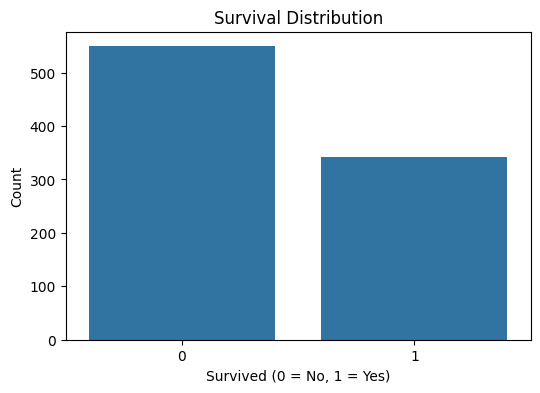

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df)
plt.title("Survival Distribution")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count") 
plt.show()

### Survival Distribution

This plot shows that a larger number of passengers did not survive .
 This indicates a class imbalance in the dataset.

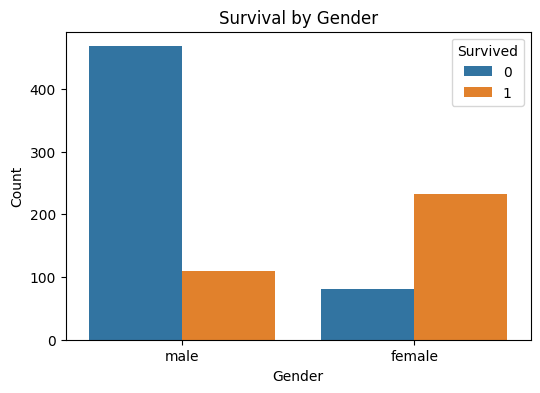

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived")
plt.show()

### Survival by Gender

Female passengers had a significantly higher survival rate than male passengers.


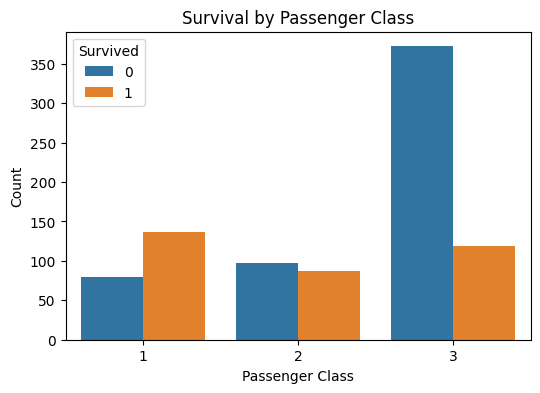

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Survived")
plt.show()

### Survival by Passenger Class

Passengers in first class survived more than those in second and third class

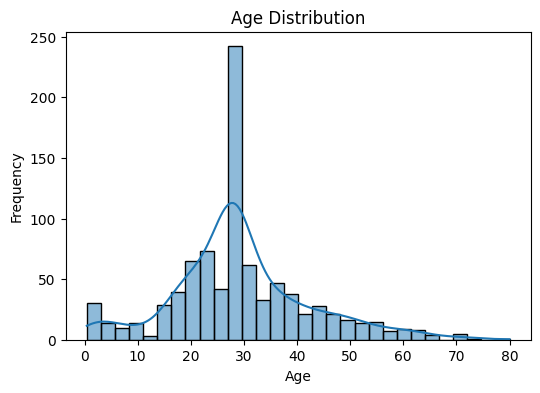

In [19]:
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

### Age Distribution

Most passengers were young to middle-aged adults, with fewer elderly passengers.


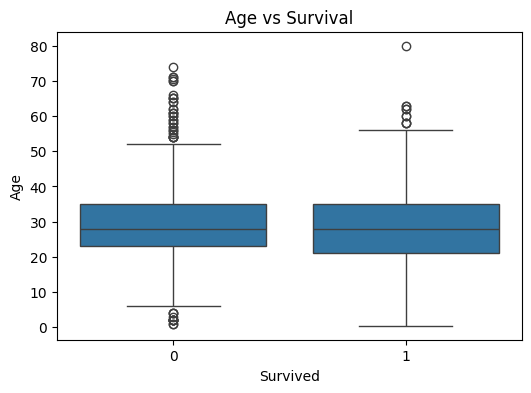

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Survived", y="Age", data=df)
plt.title("Age vs Survival")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()

### Age vs Survival

Younger passengers appear to have slightly higher survival chances compared to older passengers.

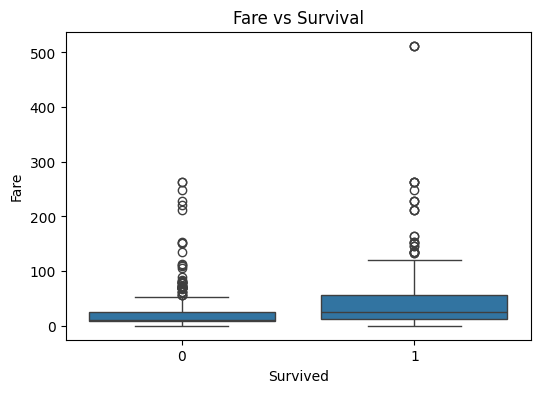

In [21]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Survived", y="Fare", data=df)
plt.title("Fare vs Survival")
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.show()

### Fare vs Survival

Passengers who paid higher fares generally showed better survival rates.

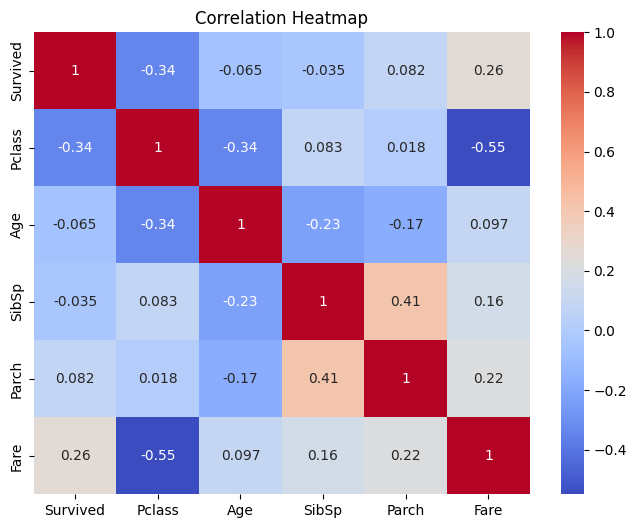

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Correlation Analysis

Passenger class and fare show noticeable correlation with survival, while age has a weaker relationship.


## Key Insights

- Female passengers had a significantly higher probability of survival compared to male passengers.
- Passengers traveling in higher classes had more chances of survival.
- Younger passengers has higher survival probabilities than the older passengers.
- Higher fare values were associated with increased survival chances.
- Socio-economic factors played a significant role in determining the survival outcomes.

## Conclusion

This exploratory data analysis focused on identifying the key factors that influenced passenger survival
on the Titanic. The analysis revealed that gender, passenger class, age, and fare were important
variables affecting survival outcomes. The cleaned dataset and insights obtained from this study
can serve as a foundation for further predictive modeling and advanced analysis.
